# Preporocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
bank = pd.read_csv('data/bank-additional.csv', sep = ';')
#Converting dependent variable categorical to dummy
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [4]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# Analisis data Client Bank dan tiap variablenya
Membuat slice data baru dari data bank yaitu bank_client yang hanya berisi beberapa variable

In [5]:
bank_client = bank.iloc[: , 0:7]
bank_client.head()

,age,job,marital,education,default,housing,loan
0,30,blue-collar,married,basic.9y,no,yes,no
1,39,services,single,high.school,no,no,no
2,25,services,married,high.school,no,yes,no
3,38,services,married,basic.9y,no,unknown,unknown
4,47,admin.,married,university.degree,no,yes,no


## Kategori di tiap variable

In [6]:
bank_client['job'].unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [7]:
bank_client['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [8]:
bank_client['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [9]:
print('Default:\n', bank_client['default'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())

Default:
 ['no' 'unknown' 'yes']
Housing:
 ['yes' 'no' 'unknown']
Loan:
 ['no' 'unknown' 'yes']


## Age
- Mencari insight dari usia

In [10]:
print('Min age: ', bank_client['age'].max())
print('Max age: ', bank_client['age'].min())
print('MEAN:', round(bank_client['age'].mean(), 1))
print('STD :', round(bank_client['age'].std(), 1))
print('Null Values: ', bank_client['age'].isnull().any())

Min age:  88
Max age:  18
MEAN: 40.1
STD : 10.3
Null Values:  False


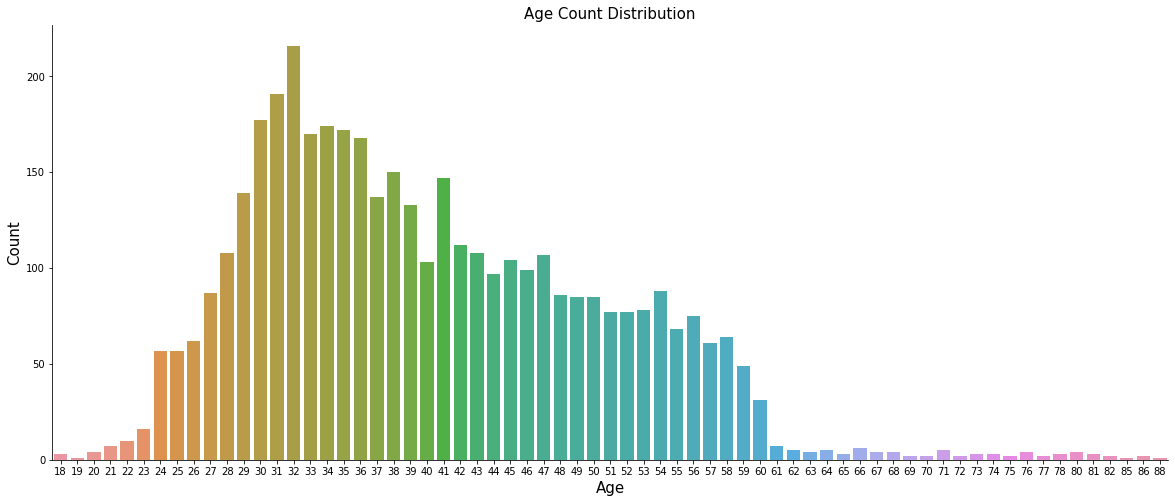

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

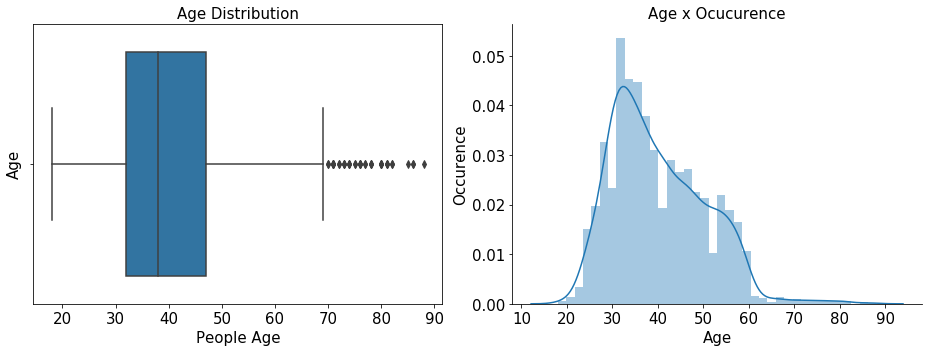

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = bank_client, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank_client['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [13]:
print('Numerber of outliers: ', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Number of clients: ', len(bank_client))
#Outliers in %
print('Outliers are:', round(bank_client[bank_client['age'] > 69.6]['age'].count()*100/len(bank_client),2), '%')

Numerber of outliers:  39
Number of clients:  4119
Outliers are: 0.95 %


**INSIGHT:** Kesimpulan tentang AGE, dari grafik yang ada kita tidak dapat menyimpulkan jika umur memiliki pengaruh yang tinggi terhadap variabel y kita, perlu terus mencari beberapa pola. dari persebaran usia  mungkin semuanya dapat berlangganan deposito berjangka, atau tidak. jadi AGE tidak berpengaruh besar dari variable y.

## JOBS

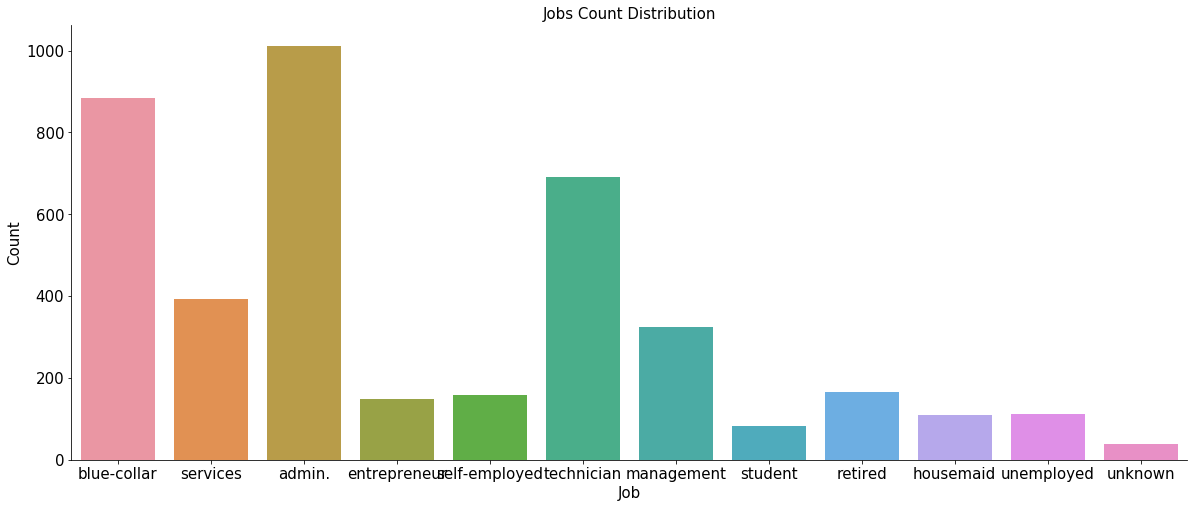

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = bank_client)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Jobs Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

## MARITAL

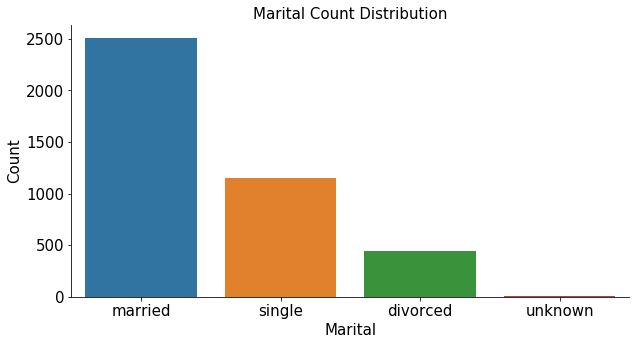

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = bank_client)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

## EDUCATION

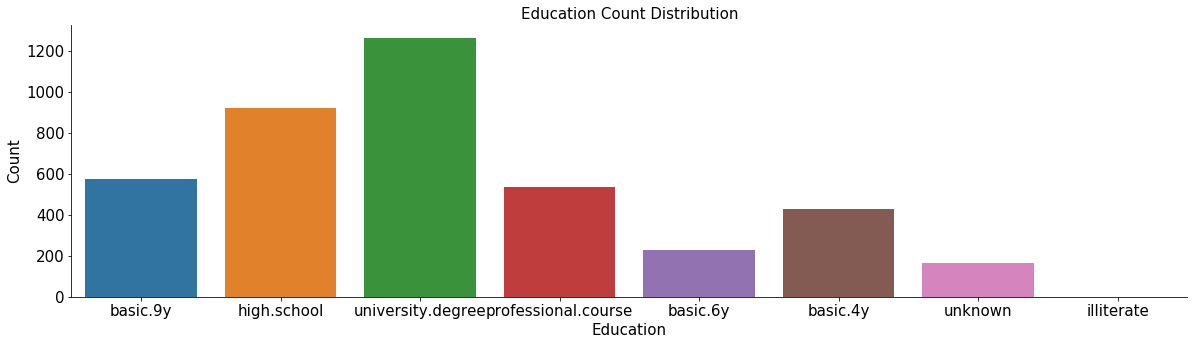

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = bank_client)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

## DEFAULT, HOUSING, LOAN

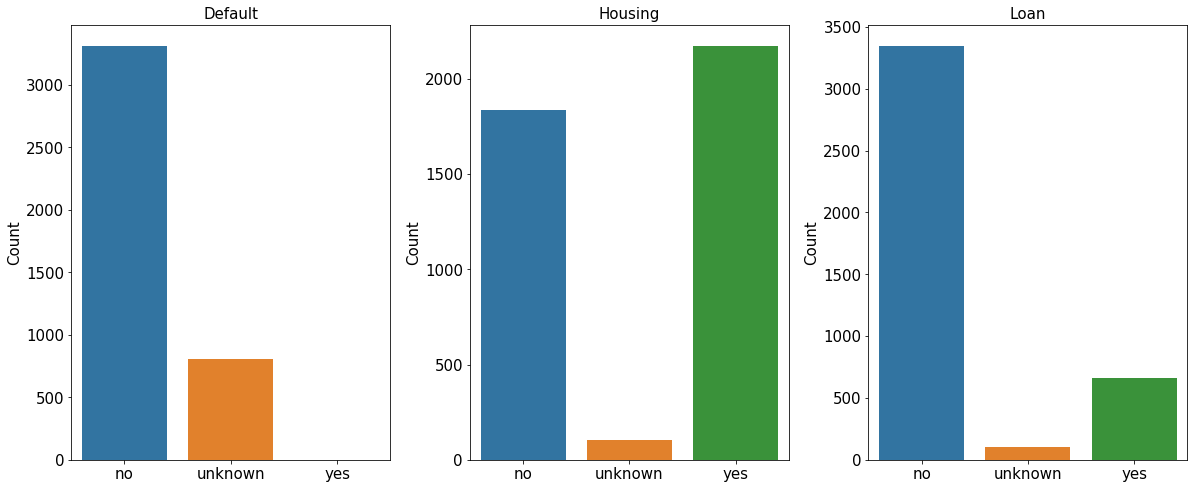

In [17]:
# Default,
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = bank_client, ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing,
sns.countplot(x = 'housing', data = bank_client, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan, 
sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

**INSIGHT**
AGE tidak terlalu berpengaruh, dan tidak memiliki relasi dengan variable manapun sehingga tidak dapat menghasilkan insight. Begitu pulan Jobs, Marital and Education, variable tersebut akan berpengaruh jika menjadi satu kesatuan dan tidak terpisah pisah. jika satu variable berdiri sendiri maka tidak akan ada makna apapun yang dapat diambil.

### Mengolah Data Bank Client dari masing masing kategori menjadi numerical

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job']) 
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan']) 

In [19]:
# grouping usia, menjadi 4 kategori
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bank_client);

In [20]:
bank_client.head()

,age,job,marital,education,default,housing,loan
0,1,1,1,2,0,2,0
1,2,7,2,3,0,0,0
2,1,7,1,3,0,2,0
3,2,7,1,2,0,1,1
4,2,0,1,6,0,2,0


In [21]:
print(bank_client.shape)
bank_client.head()

(4119, 7)


,age,job,marital,education,default,housing,loan
0,1,1,1,2,0,2,0
1,2,7,2,3,0,0,0
2,1,7,1,3,0,2,0
3,2,7,1,2,0,1,1
4,2,0,1,6,0,2,0


# Analisis data bank berdasarkan waktunya
dengan membuat slicing data bank_related yang berhubungan dengan tipe komunikasi dan last contact


In [22]:
bank_related = bank.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,cellular,may,fri,487
1,telephone,may,fri,346
2,telephone,jun,wed,227
3,telephone,jun,fri,17
4,cellular,nov,mon,58


In [23]:
bank_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [24]:
print("Contact: \n", bank_related['contact'].unique())
print("\nWhich monthis this campaing work: \n", bank_related['month'].unique())
print("\nWhich days of week this campaing work: \n", bank_related['day_of_week'].unique())

Contact: 
 ['cellular' 'telephone']

Which monthis this campaing work: 
 ['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']

Which days of week this campaing work: 
 ['fri' 'wed' 'mon' 'thu' 'tue']


## Contact, Month, Day of Week

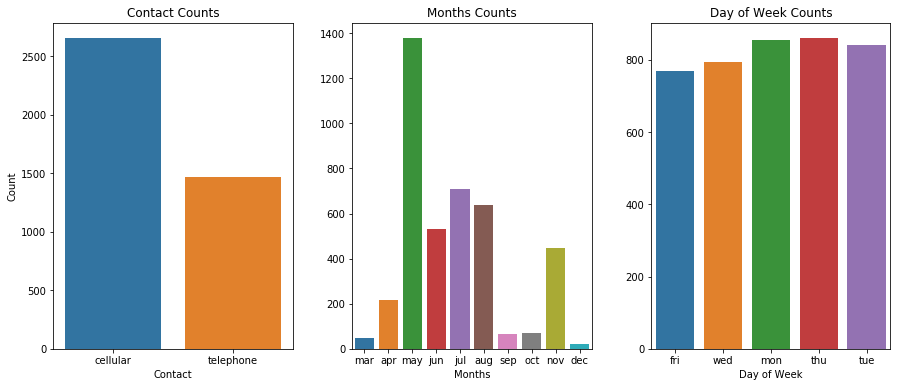

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(bank_related['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(bank_related['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(bank_related['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [26]:
print('Ages above: ', bank_related['duration'].quantile(q = 0.75) + 
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

Ages above:  638.0 are outliers


In [27]:
bank_related[bank_related['duration'] > 640].count()

contact        290
month          290
day_of_week    290
duration       290
dtype: int64

### mengubah data pada tiap kategori menjadi data numeric

In [28]:
# Label encoder kategori menjadi numerical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week']) 

In [29]:
bank_related.head()

,contact,month,day_of_week,duration
0,0,6,0,487
1,1,6,0,346
2,1,4,4,227
3,1,4,0,17
4,0,7,1,58


In [30]:
def duration(data):

    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration']    = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration']   = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration']  > 644.5, 'duration'] = 5

    return data
duration(bank_related);

In [31]:
bank_related.head()

,contact,month,day_of_week,duration
0,0,6,0,4
1,1,6,0,4
2,1,4,4,3
3,1,4,0,1
4,0,7,1,1


# Atribut Social dan economic context 
slicing data yang berisi data yang memiliki konteks sosial dan ekonomi menjadi data frame bank_se 

In [32]:
bank_se = bank.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-1.8,92.893,-46.2,1.313,5099.1
1,1.1,93.994,-36.4,4.855,5191.0
2,1.4,94.465,-41.8,4.962,5228.1
3,1.4,94.465,-41.8,4.959,5228.1
4,-0.1,93.200,-42.0,4.191,5195.8


# Atribut lainnya

In [33]:
bank_lainnya = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_lainnya.head()

,campaign,pdays,previous,poutcome
0,2,999,0,nonexistent
1,4,999,0,nonexistent
2,1,999,0,nonexistent
3,3,999,0,nonexistent
4,1,999,0,nonexistent


In [34]:
bank_lainnya['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [35]:
#mengubah data dalam tiap kategori menjadi numerik
bank_lainnya['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

# Model

In [36]:
# membuat data frame baru yang berisi kumpulan slicing data yang telah dibuat sebelumnya
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_lainnya], axis = 1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                     'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 
                     'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous', 'poutcome']]
bank_final.shape

(4119, 20)

In [37]:
#split data data trainning dan testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.1942313295, random_state = 101)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [38]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
3919,3,9,1,3,0,0,2,0,6,1,2,-1.8,92.893,-46.2,1.299,5099.1,1,999,0,1
631,2,2,1,6,0,0,2,0,0,0,1,-1.8,93.075,-47.1,1.405,5099.1,3,999,0,1
3858,2,0,1,6,0,0,0,0,3,0,4,1.4,93.918,-42.7,4.957,5228.1,1,999,0,1
1169,1,1,1,5,0,2,0,0,6,2,5,-1.8,92.893,-46.2,1.266,5099.1,2,999,0,1
2851,2,11,1,2,0,0,0,1,6,2,3,1.1,93.994,-36.4,4.860,5191.0,4,999,0,1


## Model Logistic Regression

In [39]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)

print(confusion_matrix(y_test, logpred))
print(accuracy_score(y_test,logpred))
print(classification_report(y_test, logpred))

LOGCV = accuracy_score(y_test,logpred)

[[699  11]
 [ 59  32]]
0.9126092384519351
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       710
           1       0.74      0.35      0.48        91

    accuracy                           0.91       801
   macro avg       0.83      0.67      0.71       801
weighted avg       0.90      0.91      0.90       801



## Model KNearestNeighbors

k=1 88.31 (+/- 1.80)
k=2 90.07 (+/- 1.58)
k=3 89.26 (+/- 1.97)
k=4 90.01 (+/- 1.86)
k=5 89.29 (+/- 1.57)
k=6 90.13 (+/- 1.77)
k=7 89.71 (+/- 1.56)
k=8 90.17 (+/- 1.85)
k=9 89.86 (+/- 1.82)
k=10 90.07 (+/- 1.81)
k=11 89.92 (+/- 1.65)
k=12 89.92 (+/- 1.69)
k=13 90.01 (+/- 1.52)
k=14 90.14 (+/- 1.47)
k=15 90.07 (+/- 1.50)
k=16 90.07 (+/- 1.56)
k=17 89.80 (+/- 1.73)
k=18 90.07 (+/- 1.64)
k=19 89.92 (+/- 1.58)
k=20 90.04 (+/- 1.83)
k=21 90.07 (+/- 1.63)
k=22 90.07 (+/- 1.75)
k=23 89.80 (+/- 1.56)
k=24 89.86 (+/- 1.73)
k=25 89.86 (+/- 1.76)
The optimal number of neighbors is 7 with 90.2%


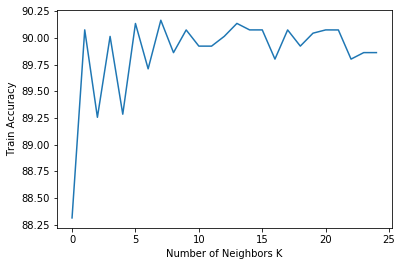

In [41]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(bank_final, y, test_size = 0.2, random_state = 101)

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(accuracy_score(y_test,knnpred))
print(classification_report(y_test, knnpred))

KNNCV = accuracy_score(y_test,knnpred)

[[699  11]
 [ 75  16]]
0.8926342072409488
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       710
           1       0.59      0.18      0.27        91

    accuracy                           0.89       801
   macro avg       0.75      0.58      0.61       801
weighted avg       0.87      0.89      0.87       801



## Model Support Vector Machine

In [43]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(accuracy_score(y_test,svcpred))
print(classification_report(y_test, svcpred))

SVCCV = accuracy_score(y_test,svcpred)

[[657  53]
 [ 63  28]]
0.8551810237203495
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       710
           1       0.35      0.31      0.33        91

    accuracy                           0.86       801
   macro avg       0.63      0.62      0.62       801
weighted avg       0.85      0.86      0.85       801



## Model Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(accuracy_score(y_test,gaussiannbpred))
print(classification_report(y_test, gaussiannbpred))

GAUSIAN = accuracy_score(y_test,gaussiannbpred)

[[624  86]
 [ 41  50]]
0.8414481897627965
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       710
           1       0.37      0.55      0.44        91

    accuracy                           0.84       801
   macro avg       0.65      0.71      0.67       801
weighted avg       0.87      0.84      0.85       801



## Model Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy') 
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(accuracy_score(y_test,dtreepred))
print(classification_report(y_test, dtreepred))

DTREECV = accuracy_score(y_test,dtreepred)

[[655  55]
 [ 48  43]]
0.8714107365792759
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       710
           1       0.44      0.47      0.46        91

    accuracy                           0.87       801
   macro avg       0.69      0.70      0.69       801
weighted avg       0.88      0.87      0.87       801



In [46]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(max_depth=7, random_state=0, criterion="entropy")
classifier.fit(X_train,y_train)
print(classifier.decision_path)

<bound method BaseDecisionTree.decision_path of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')>


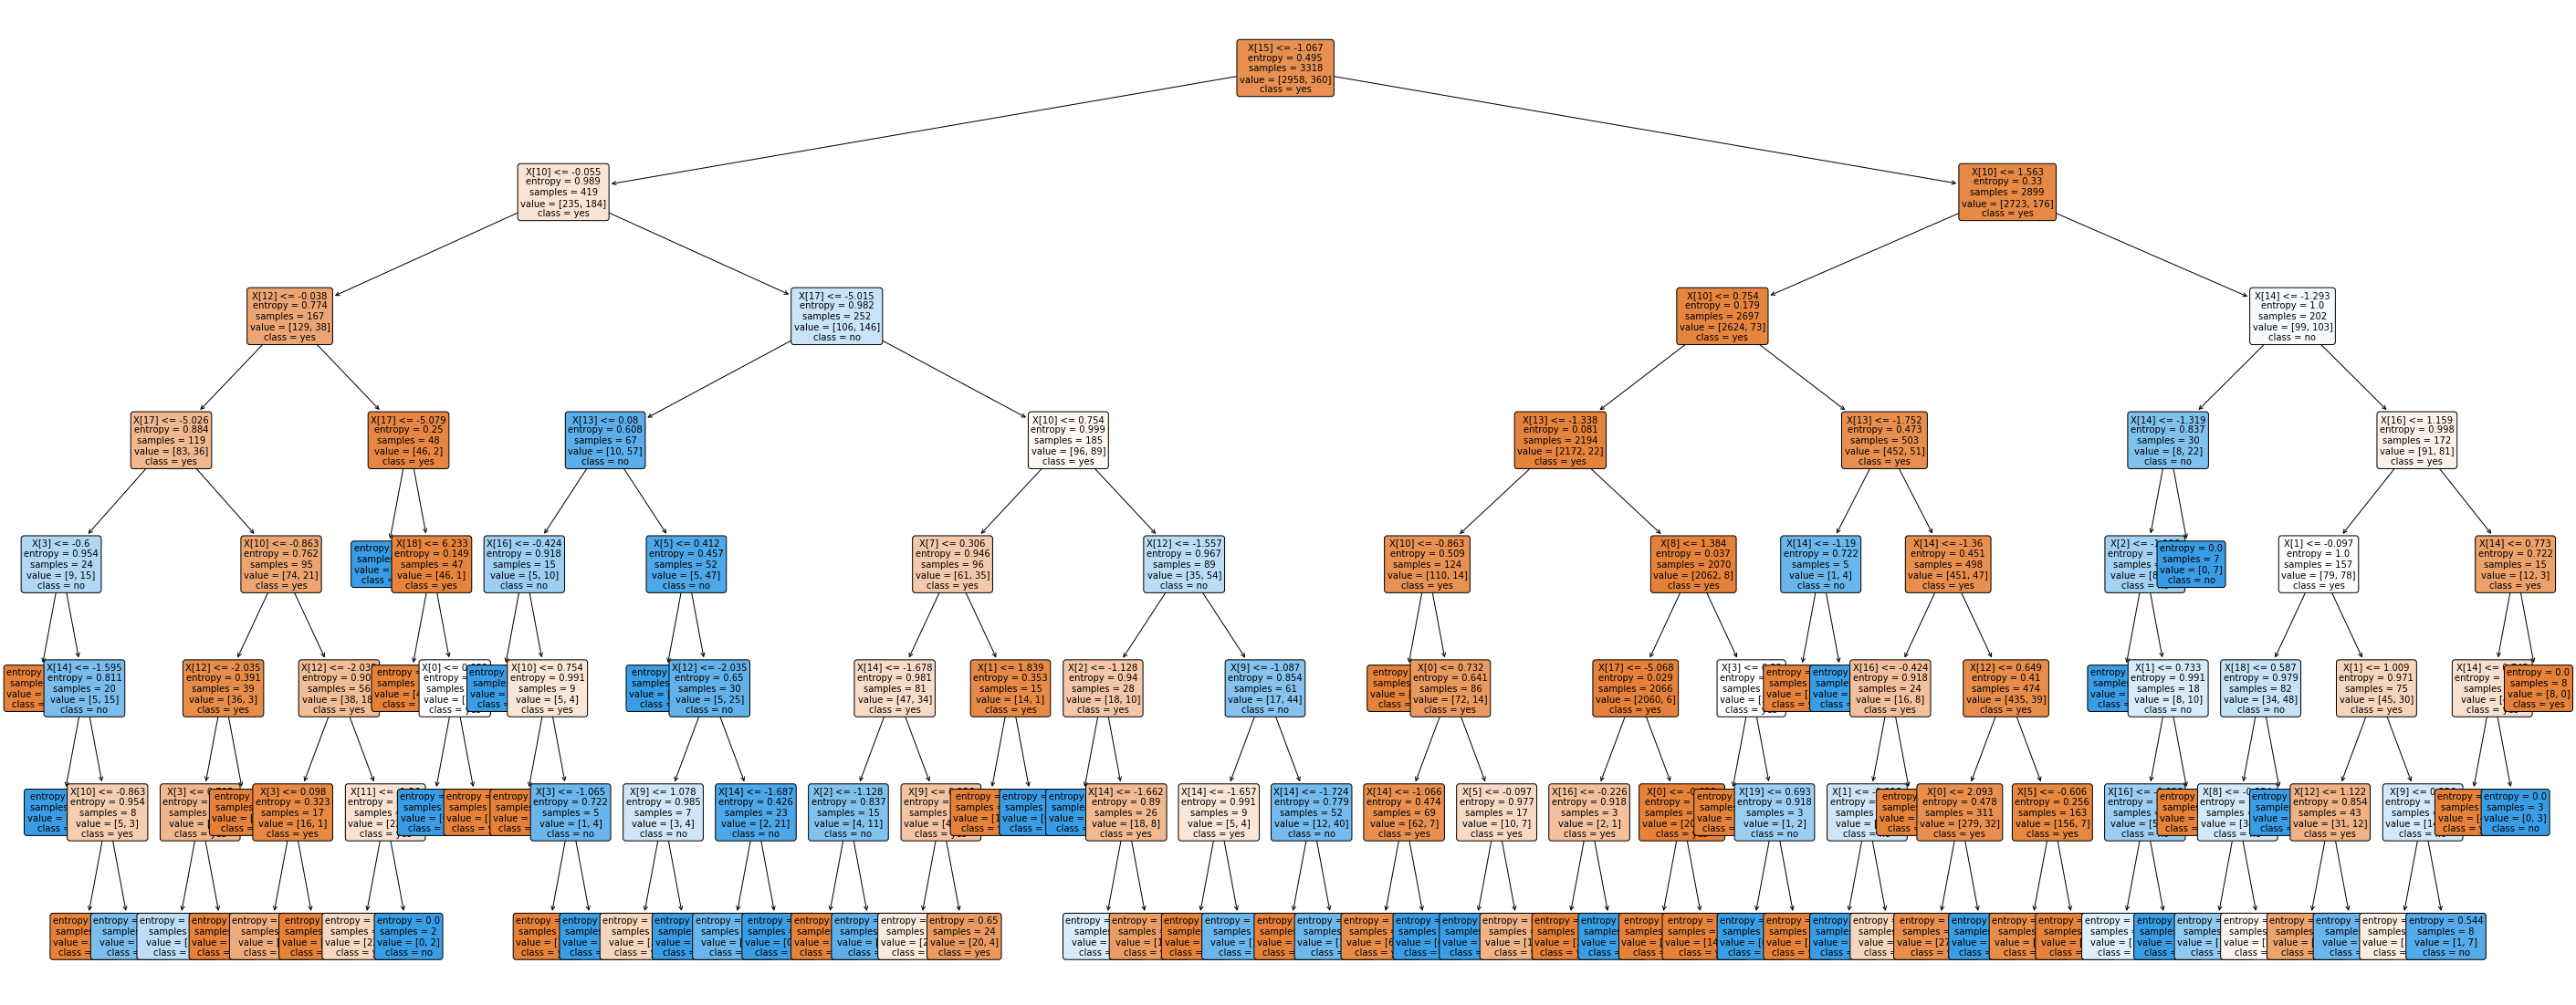

In [47]:
# Visualisasi Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(50,20))
target = ['yes', 'no']
a = plot_tree(classifier, 
              class_names=target,
              filled=True, 
              rounded=True,
             fontsize=10)

## Model Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(accuracy_score(y_test,rfcpred))
print(classification_report(y_test, rfcpred))

RFCCV = accuracy_score(y_test,rfcpred)

[[683  27]
 [ 58  33]]
0.8938826466916354
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       710
           1       0.55      0.36      0.44        91

    accuracy                           0.89       801
   macro avg       0.74      0.66      0.69       801
weighted avg       0.88      0.89      0.88       801



## Best Model

In [49]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', ],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN]})

models.sort_values(by='Score', ascending=False)

,Models,Score
4,Logistic Model,0.912609
0,Random Forest Classifier,0.893883
3,K-Near Neighbors,0.892634
1,Decision Tree Classifier,0.871411
2,Support Vector Machine,0.855181
5,Gausian NB,0.841448


# Analisis Hasil Model Terbaik
### Model Logistic Regression

In [50]:
from sklearn.metrics import classification_report

In [51]:
print('Logistic Regression Confusion Matrix\n', confusion_matrix(y_test, logpred))

Logistic Regression Confusion Matrix
 [[699  11]
 [ 59  32]]


In [52]:
print('Logistic Regression Reports\n',classification_report(y_test, logpred))

Logistic Regression Reports
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       710
           1       0.74      0.35      0.48        91

    accuracy                           0.91       801
   macro avg       0.83      0.67      0.71       801
weighted avg       0.90      0.91      0.90       801



### sensitivity/ recall
true positif ada 32, total positif ada 91, berarti, sensitivity nya adalah 32/91 = 0.35

### specificity
true negatif ada 699, total negatif 710, berarti, specificity nya adalah 699/710 = 0.98

### positive predictive value/ precision
true positif ada 32, true + false positif ada 43, bearti, rasio nya 32/43= 0.74

## Jadi disimpulkan bahwa hasil akurasi dari model Logistic Regression lebih tinggi dibandingkan dengan model lainnya, dengan nilai nilai yang sesuai dengan analisa yang dilakukan
